<a href="https://colab.research.google.com/github/The-Kaggle-Crew-18/Kaggle-Challenge-18/blob/main/KaggleChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = 'https://raw.githubusercontent.com/The-Kaggle-Crew-18/Kaggle-Challenge-18/main/train.csv'
train_df = pd.read_csv(data)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: >

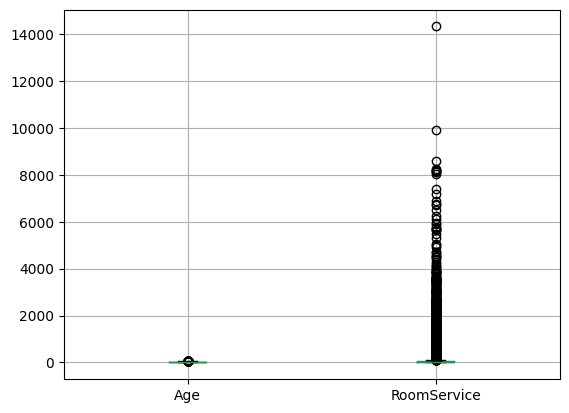

In [4]:
train_df.boxplot(column = ["Age", "RoomService"])

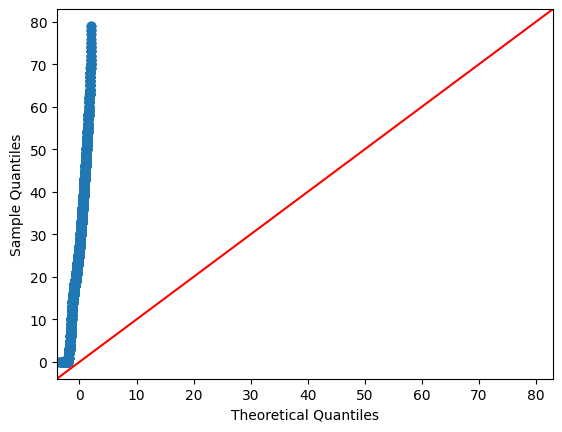

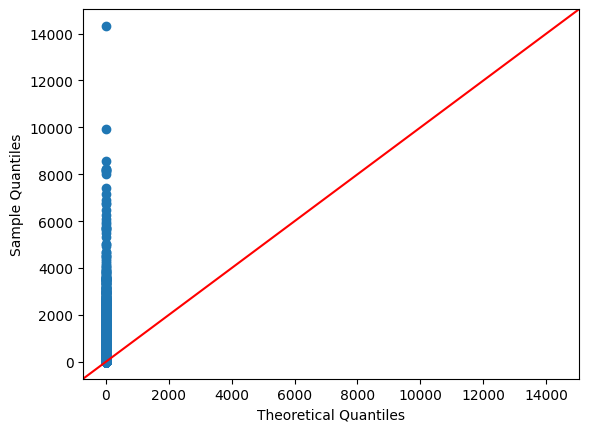

In [ ]:
import statsmodels.api as sm

sm.qqplot(df['Age'], line ='45')
plt.show()

sm.qqplot(df['RoomService'], line ='45')
plt.show()


In [ ]:
df[['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported','VIP']].corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,VIP
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026,0.092819
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611,0.058785
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566,0.129799
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141,0.018295
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131,0.061059
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075,0.125974
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000,-0.037650
VIP,0.092819,0.058785,0.129799,0.018295,0.061059,0.125974,-0.037650,1.000000


In [ ]:
import seaborn as sns

<Axes: >

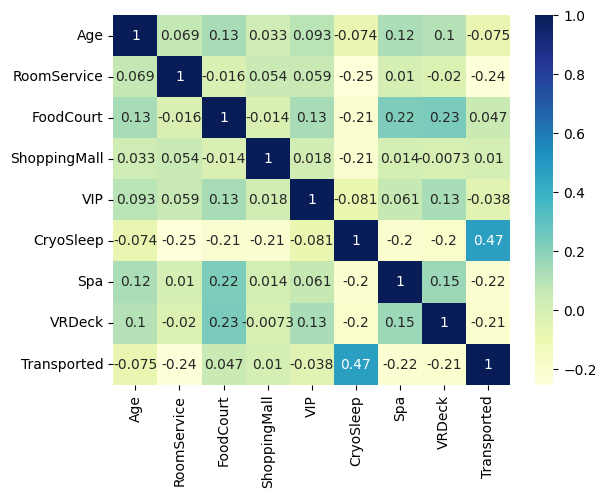

In [ ]:
sns.heatmap(df[['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'VIP','CryoSleep','Spa', 'VRDeck','Transported']].corr(), cmap="YlGnBu", annot=True)

<Axes: xlabel='Age'>

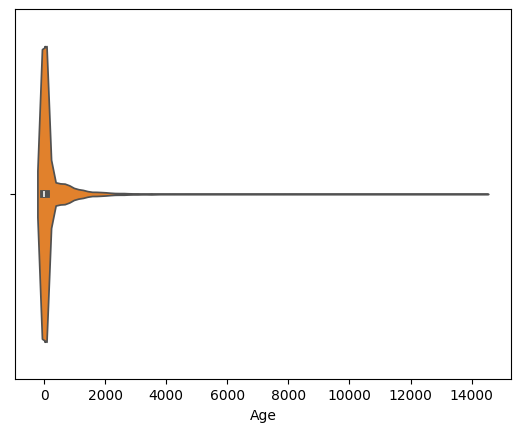

In [ ]:
import seaborn as sns

sns.violinplot(data=df, x="Age")
sns.violinplot(data=df, x="RoomService")
